# Лабораторная работа 2

## Алгоритм K ближайших соседей

1. Цель работы:

    1. Понимание принципа работы алгоритма K ближайших соседей (KNN).

    2. Умение подбирать оптимальное количество соседей для алгоритма.

    3. Применение KNN на практических примерах.

2. Основные задачи работы:

    1. Научиться предобрабатывать данные используя статистические методы.

    2. Научиться разделять выборку на тестовую и обучающую.

    3. Научиться оценивать результаты модели.

Алгоритм K ближайших соседей (KNN) - это один из самых простых алгоритмов машинного обучения. Идея KNN основана на предположении о близости объектов: если объекты "похожи", то их целевые переменные также будут "похожи". Похожесть объектов определяется на основе некоторой функции расстояния, например, Евклидова расстояния.

В контексте классификации алгоритм KNN предсказывает класс нового объекта на основе классов его K ближайших соседей в обучающем наборе. Самый распространенный класс среди соседей выбирается в качестве предсказанного класса.

# Выполнение работы

## Вариант 1.

Пусть имеется N точек в R[0, 10]xR[0, 10]. Эти N точек разделены на k кластеров: красные, синие, зеленые и др. Эти точки будут составлять обучающую выборку данных. 

Необходимо подготовить обучающие данные и реализовать алгоритм K ближайших соседей классификации для новых 0.1*N точек, вывести матрицу ошибок (confusion matrix) и оценку точности предсказания (accuracy score), показать работу алгоритма графически(вывести раскрашенные точки обучающей выборки; вывести точки тестовой выборки с, определенным алгоритмом К ближайших соседей цветом.

0. Подготовьте данные для тестирования алгоритма.
Необходимо подготовить тренировочные данные, чтобы можно было наблюдать видимое различие между разными сегментами.
Например, красные точки лежат в левом нижнем углу квадрата R[0, 10]xR[0, 10], cиние по центру, зеленые в правом верхнем углу.

1. Создайте тестовую выборку точек с предопределенными значениями цвета. Используя евклидову метрику, найдите k ближайших соседей к каждой точке, определите цвет в зависимости от доминирующего цвета соседних точек, нарисуйте окружность, в которую входят k соседних точек.

2. Оцените качество модели с использованием метрики accuracy score и выводом матрицы ошибок.

In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

1. Создание или загрузка набора данных: В зависимости от варианта необходимо создать искусственный набор данных или использовать один из предоставленных.

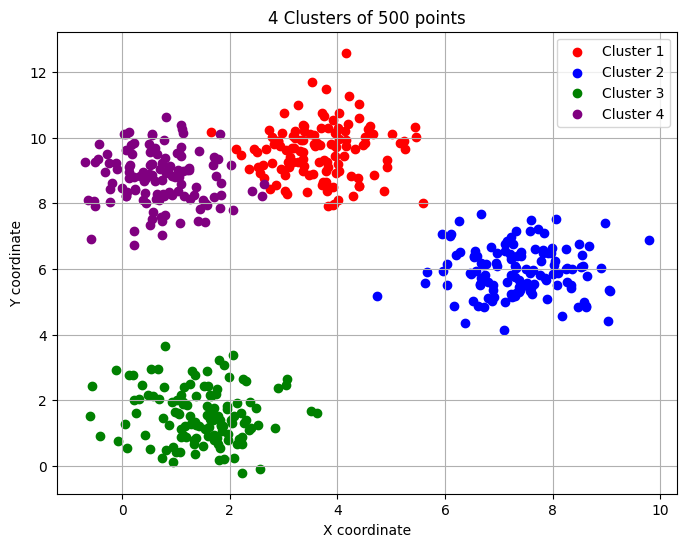

In [23]:
# Параметры
N = 500  # Общее количество точек
k_clusters = 4  # Количество кластеров
colors = ['red', 'blue', 'green', 'purple']  # Цвета для кластеров

# Генерация данных
X, y = make_blobs(n_samples=N, centers=k_clusters, cluster_std=0.8, random_state=42, center_box=(0, 10))

# Визуализация данных
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X[y == i][:, 0], X[y == i][:, 1], color=colors[i], label=f'Cluster {i+1}')

plt.title(f'{k_clusters} Clusters of {N} points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.grid(True)
plt.show()

2. Разделение данных на обучающую и тестовую выборки: Разделите данные на обучающую и тестовую выборки, чтобы можно было оценить качество модели.

In [ ]:
# Разделение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


3. Моделирование алгоритма KNN: Смоделируйте алгоритм KNN, выберите подходящее количество соседей и обучите модель на обучающей выборке.

In [25]:
k_neighbors = 5  # Количество ближайших соседей для KNN

# Обучение KNN
knn = KNeighborsClassifier(n_neighbors=k_neighbors)
knn.fit(X_train, y_train)

# Прогнозирование для тестовых данных
y_pred = knn.predict(X_test)

4. Оценка модели: Оцените качество модели с использованием подходящих метрик accuracy score и выводом матрицы ошибок.

Accuracy: 0.98


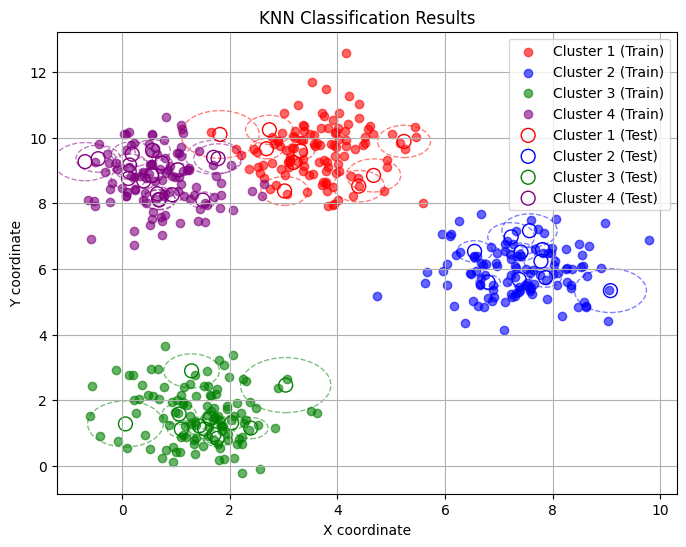

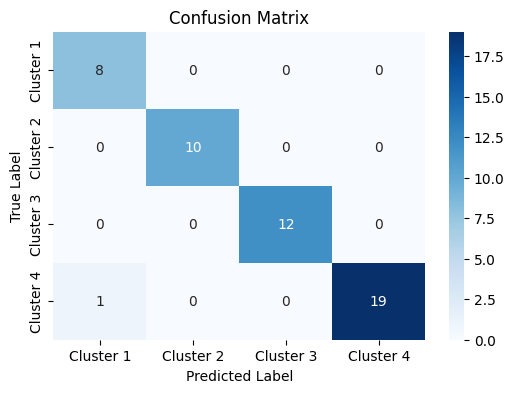

In [26]:
# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Визуализация обучающей выборки
plt.figure(figsize=(8, 6))

for i in range(k_clusters):
    plt.scatter(X_train[y_train == i][:, 0], 
                X_train[y_train == i][:, 1], 
                color=colors[i], 
                label=f'Cluster {i+1} (Train)', 
                alpha=0.6)

# Визуализация тестовой выборки с предсказанными цветами
for i in range(k_clusters):
    test_points = X_test[y_pred == i]
    plt.scatter(test_points[:, 0], 
                test_points[:, 1], 
                edgecolor=colors[i], 
                facecolor='none', 
                label=f'Cluster {i+1} (Test)', 
                marker='o', 
                s=100)

    # Для каждого тестового пункта рисуем окружность, охватывающую k ближайших соседей
    for test_point in test_points:
        distances, indices = knn.kneighbors([test_point])
        radius = distances[0][-1]  # Расстояние до k-го ближайшего соседа
        circle = plt.Circle(test_point, radius, color=colors[i], fill=False, linestyle='dashed', alpha=0.5)
        plt.gca().add_artist(circle)

plt.title('KNN Classification Results')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.grid(True)
plt.show()

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Cluster {i+1}' for i in range(k_clusters)], 
            yticklabels=[f'Cluster {i+1}' for i in range(k_clusters)])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Теоретические вопросы и ответы:

### 1. Что такое алгоритм K ближайших соседей?

Алгоритм K ближайших соседей (K-Nearest Neighbors, KNN) — это метод машинного обучения, используемый для задач классификации и регрессии. Вот основные характеристики алгоритма:

1. **Принцип работы**:
   - KNN работает на основе принципа, что похожие объекты находятся близко друг к другу в пространстве признаков.
   - Для классификации нового объекта алгоритм ищет $k$ ближайших соседей из обучающей выборки и принимает решение на основе меток этих соседей (например, голосование).
   - Для регрессии KNN вычисляет среднее значение или медиану значений целевой переменной ближайших соседей.

2. **Метрики расстояния**:
   - Алгоритм использует метрики расстояния (например, евклидово расстояние, манхэттенское расстояние) для определения "близости" между точками в пространстве признаков.

3. **Параметр K**:
   - $k$ — это число соседей, которое необходимо учитывать. Значение $k$ влияет на качество классификации: маленькие значения могут привести к шуму, а большие — к переобучению.

4. **Преимущества**:
   - Простота и наглядность.
   - Не требует обучения модели в традиционном смысле (модель просто хранит данные).
   - Подходит для многоклассовых задач.

5. **Недостатки**:
   - Высокие вычислительные затраты на этапе предсказания, особенно при больших объемах данных.
   - Чувствительность к шуму и выбросам в данных.
   - Потребность в масштабировании признаков (нормализация), если используются разные единицы измерения.

6. **Применение**:
   - Используется в задачах классификации текста, распознавания образов, рекомендационных системах и других областях, где требуется классификация или предсказание значений. 

В целом, KNN — это интуитивно понятный и полезный алгоритм, особенно для небольших и средних объемов данных.

### 2. Как выбирается класс объекта в алгоритме KNN?

Класс объекта в алгоритме K ближайших соседей (KNN) выбирается на основе голосования среди $k$ ближайших соседей. Вот шаги этого процесса:

1. **Нахождение соседей**:
   - Для нового объекта (который необходимо классифицировать) алгоритм вычисляет расстояния до всех объектов в обучающей выборке, используя выбранную метрику расстояния (например, евклидово расстояние).
   - Затем он выбирает $k$ объектов с наименьшими расстояниями. Эти объекты считаются ближайшими соседями.

2. **Голосование**:
   - Каждому из $k$ соседей присваивается класс (метка).
   - Алгоритм выполняет голосование: каждый сосед "голосует" за свой класс.

3. **Определение класса**:
   - Класс, который получает наибольшее количество голосов от ближайших соседей, становится классом для нового объекта.
   - В случае равенства голосов (например, при чётном $k$), может применяться метод, например, случайный выбор среди классов с наибольшим количеством голосов или использование расстояний (ближайший сосед с меньшим расстоянием получает больший вес).

### 3. Как влияет количество соседей на работу алгоритма?

Количество соседей ($k$) в алгоритме K ближайших соседей (KNN) оказывает значительное влияние на его работу и качество предсказаний. Вот основные аспекты, которые стоит учитывать:

1. **Малое значение $k$**:
   - **Чувствительность к шуму**: Небольшие значения $k$ (например, $k = 1$) могут приводить к тому, что алгоритм будет слишком чувствительным к шуму и выбросам в данных. Это может привести к переобучению, когда модель слишком хорошо подстраивается под обучающую выборку, но плохо работает на новых данных.
   - **Острые границы**: Алгоритм будет создавать более сложные и резкие границы между классами, что может привести к высокой дисперсии.

2. **Большое значение $k$**:
   - **Сглаживание**: Увеличение $k$ приводит к более сглаженной классификации, так как учитываются более широкие области. Это может улучшить устойчивость к шуму.
   - **Переобучение**: Слишком большое $k$ может привести к недообучению, когда модель теряет способность распознавать отдельные классы, поскольку все точки начинают рассматриваться как принадлежащие к одной категории.
   - **Трудности с равенством классов**: При больших $k$ может возникнуть ситуация, когда классы будут равномерно распределены среди ближайших соседей, что затрудняет определение класса.

3. **Влияние на производительность**:
   - Увеличение $k$ может замедлить процесс классификации, так как алгоритму нужно учитывать больше соседей и вычислять расстояния до них.
   - Подбор оптимального значения $k$ может зависеть от конкретного набора данных. Часто применяется метод кросс-валидации для нахождения наилучшего $k$.

### 4. Какую метрику Вы использовали в алгоритме KNN?

Использовалась **евклидова метрика**. 

Эта метрика измеряет расстояние между двумя точками в многомерном пространстве и рассчитывается по формуле:

$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

где $x$ и $y$ — это векторы признаков, а $n$ — количество признаков.

